Polynomial Regression

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Generating data by adding noise from the normal distribution to the function sin( x^2 ) where x is in radians.

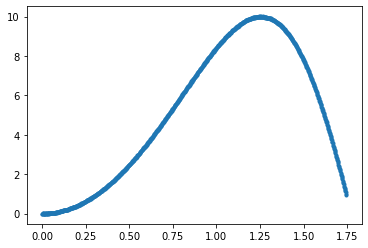

In [2]:
x = np.array([i*np.pi/180 for i in np.linspace(0,100,1000)])
x1 = x #Saving a copy for future use
n = len(x)
y = 10*np.sin(x*x)+np.random.normal(0,0.01,n)
y1 = y

plt.plot(x,y,'.')
plt.show()

Completing the matrix by adding rows 1 , x^2 , x^3 and so on.

Final x matrix is of the form [[1],[x],[x^2]...]

Weights initialised.

In [0]:
deg = 8 # degree of polynomial
w = np.random.randn(deg+1)
ones = np.ones(n)
x = np.vstack((ones,x))

for i in range(deg-1):
  x = np.vstack((x,x[1]*x[-1]))

#Normalization
x[1:,:] = (x[1:,:] - np.mean(x[1:,:],axis=1).reshape(-1,1)) / np.std(x[1:,:],axis=1).reshape(-1,1)

Cost Function

In [0]:
def cost():
  j = (w.dot(x)-y)**2
  j = 1/2 * n * np.sum(j)
  return j

Gradient Descent

In [0]:
def update(lr):
  for j in range(deg+1):
    delj = 0
    for i in range(n):
      delj += (w.dot(x[:,i])-y[i])*x[j][i]
    delj /= n
    w[j] = w[j] - lr * delj

Loss:68264.1300496852


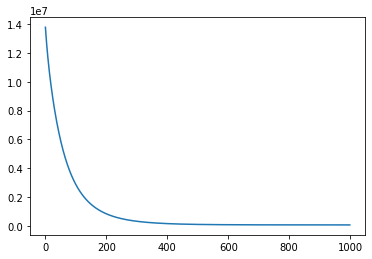

In [6]:
iter = np.arange(1000)
j = []
lr = 0.01
for i in range(1000):
  j.append(cost())
  update(lr)

print(f'Loss:{cost()}')
plt.plot(iter,j)
plt.show()

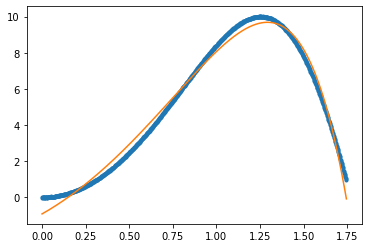

In [7]:
fx = [w.dot(x[:,i]) for i in range(n)]
plt.plot(x1,y,'.',x1,fx)
plt.show()

Fitting polynomial using sklearn.

Loss:0.00010510849101812794


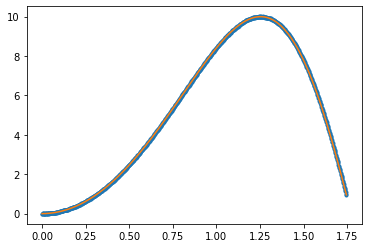

In [8]:
x1 = x1[:, np.newaxis]
y1 = y1[:, np.newaxis]

poly_feat = PolynomialFeatures(degree=8)
x_poly = poly_feat.fit_transform(x1)

model = LinearRegression()
model.fit(x_poly, y1)
y_pred = model.predict(x_poly)

print(f'Loss:{mean_squared_error(y1,y_pred)}')
plt.plot(x1,y,'.',x1,y_pred)